In [1]:
import tensorflow as tf
import numpy as np

2023-11-30 12:37:02.350611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
# capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

2023-11-30 12:37:37.373638: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


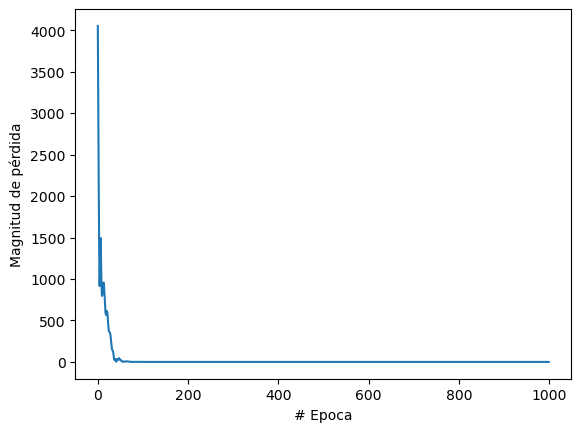

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [8]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 310ms/step
El resultado es [[211.74744]] fahrenheit!


In [10]:
print("Variables internas del modelo")
#print(capa.get_weights())

print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.6300336 ,  0.89451325, -0.17214926]], dtype=float32), array([-3.592646,  4.0491  ,  4.064345], dtype=float32)]
[array([[-0.67184615, -0.7399331 , -0.45995164],
       [-0.15918055,  1.245546  ,  0.6004894 ],
       [ 1.424391  ,  0.5844157 ,  0.9941546 ]], dtype=float32), array([3.5323236, 4.095334 , 3.6062593], dtype=float32)]
[array([[0.66223586],
       [0.8823278 ],
       [0.7147205 ]], dtype=float32), array([3.7190912], dtype=float32)]
